In [1]:
# !pip install -U visualkeras

     ---------------------------------------- 43.2/43.2 KB 2.1 MB/s eta 0:00:00


In [2]:
import tensorflow as tf

In [3]:
inception = tf.keras.applications.InceptionResNetV2()

225209952/225209952 [==============================] - 6s 0us/step


In [11]:
tf.keras.utils.plot_model(inception)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [22]:
input_ = tf.keras.Input((28,28))
x = tf.keras.layers.Flatten()(input_)
model = tf.keras.Model(input_,x)

In [24]:
input_ = tf.keras.Input((28,28))
x = tf.keras.layers.Flatten()(input_)
x = tf.keras.layers.Dense(3)(x)
y = tf.keras.layers.Dense(3)(x)
z = tf.keras.layers.Concatenate()([x,y])
model3 = tf.keras.Model(input_, z)

In [18]:
model2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28)),
    tf.keras.layers.Flatten()
])

In [19]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [25]:
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_4 (Flatten)            (None, 784)          0           ['input_6[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 3)            2355        ['flatten_4[0][0]']              
                                                                                                  
 dense_3 (Dense)                (None, 3)            12          ['dense_2[0][0]']                
                                                                                            

In [26]:
tf.keras.utils.plot_model(model3)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [3]:
input_ = tf.keras.Input((28,28))
x = tf.keras.layers.Flatten()(input_)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.Dense(10)(x)

In [4]:
model4 = tf.keras.Model(input_, x)

In [5]:
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
tf.keras.utils.plot_model(model4, rankdir='LR')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [7]:
import visualkeras

In [8]:
visualkeras.layered_view(model4)

TypeError: 'int' object is not iterable

In [11]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(10)
])

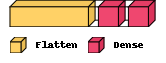

In [13]:
visualkeras.layered_view(model5, legend=True)

In [14]:
input_ = tf.keras.Input((28,28))

In [18]:
flatten = tf.keras.layers.Flatten()
dense1 = tf.keras.layers.Dense(128)
dense2 = tf.keras.layers.Dense(10)

In [19]:
dense2(dense1(flatten(input_))) # 합성함수

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_7')>

In [20]:
input_ = tf.keras.Input((28,28))
flatten = tf.keras.layers.Flatten()(input_)
dense1 = tf.keras.layers.Dense(128)(flatten)
dense2 = tf.keras.layers.Dense(10)(dense1)

In [22]:
model6 = tf.keras.Model(input_, dense2)

In [23]:
model6.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.compile(loss=)

In [ ]:
1. oop (camel style)
2. functional (snake style)
3. string (function 의 이름)

In [24]:
# 1. argument 변경시
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [25]:
loss

In [49]:
# 2. () 없이 > agument 변경할려면 
# 2-1. agument 변경할려면 partial 테크닉
# 2-2. nested function
loss = tf.keras.losses.sparse_categorical_crossentropy

In [27]:
from functools import partial

In [28]:
loss = partial(tf.keras.losses.sparse_categorical_crossentropy, from_logits=True)

In [29]:
model6.compile(loss=loss)

In [30]:
def myloss(from_logits=True):
    def x(y_true, y_pred):
        return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
    return x

In [31]:
# 3. string
model6.compile(loss='sparse_categorical_crossentropy')

In [61]:
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

In [62]:
loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

In [63]:
assert loss.shape == (2,)

In [64]:
loss.numpy()

array([0.05129344, 2.3025851 ], dtype=float32)

In [78]:
loss_f = tf.keras.losses.sparse_categorical_crossentropy

In [79]:
loss_f(y_true, y_pred).numpy()

array([0.05129344, 2.3025851 ], dtype=float32)

In [81]:
loss_f(y_true, y_pred, True).numpy()

array([0.58406353, 1.3897266 ], dtype=float32)